In [2]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
x=pd.read_csv("train.csv")
y=pd.read_csv("test.csv")
s=pd.read_csv("gender_submission.csv")

In [4]:
x.isnull().sum()[x.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
x_target=x.Survived
x.drop(columns="Survived",inplace=True)

In [6]:
xy=pd.concat([x,y])

In [7]:
xy.isnull().sum()[xy.isnull().sum()>0]

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [8]:
xy.Embarked=xy.Embarked.fillna(xy.Embarked.mode()[0])
xy.Fare=xy.Fare.fillna(xy.Fare.mean())
xy.Age=xy.Age.fillna(xy.Age.mean())


In [9]:
xy.Age.mean()

29.881137667304014

In [10]:
x.shape

(891, 11)

In [11]:
y.shape

(418, 11)

In [12]:
xy.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
xy.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [14]:
xy=pd.get_dummies(xy,drop_first=True)

In [15]:
xy.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [16]:
from sklearn.preprocessing import StandardScaler
ssc=StandardScaler()


In [17]:
xy.Fare=ssc.fit_transform(xy[["Fare"]])
xy.Age=ssc.fit_transform(xy[["Age"]])

In [18]:
xy["Family"]=xy.SibSp+xy.Parch

In [19]:
xy.drop(columns=["Parch","SibSp"],inplace=True)

In [20]:
xy.head()

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Family
0,3,-0.611972,-0.503595,1,0,1,1
1,1,0.630431,0.734503,0,0,0,1
2,3,-0.301371,-0.490544,0,0,1,0
3,1,0.397481,0.382925,0,0,1,1
4,3,0.397481,-0.488127,1,0,1,0


In [23]:
x.shape

(891, 11)

In [24]:
x_=xy[:891]
x_.shape

(891, 7)

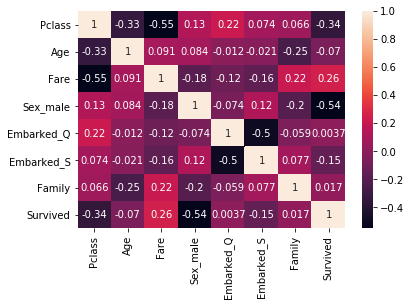

In [27]:
z=x_.copy()
z["Survived"]=x_target
sns.heatmap(z.corr(),annot=True)

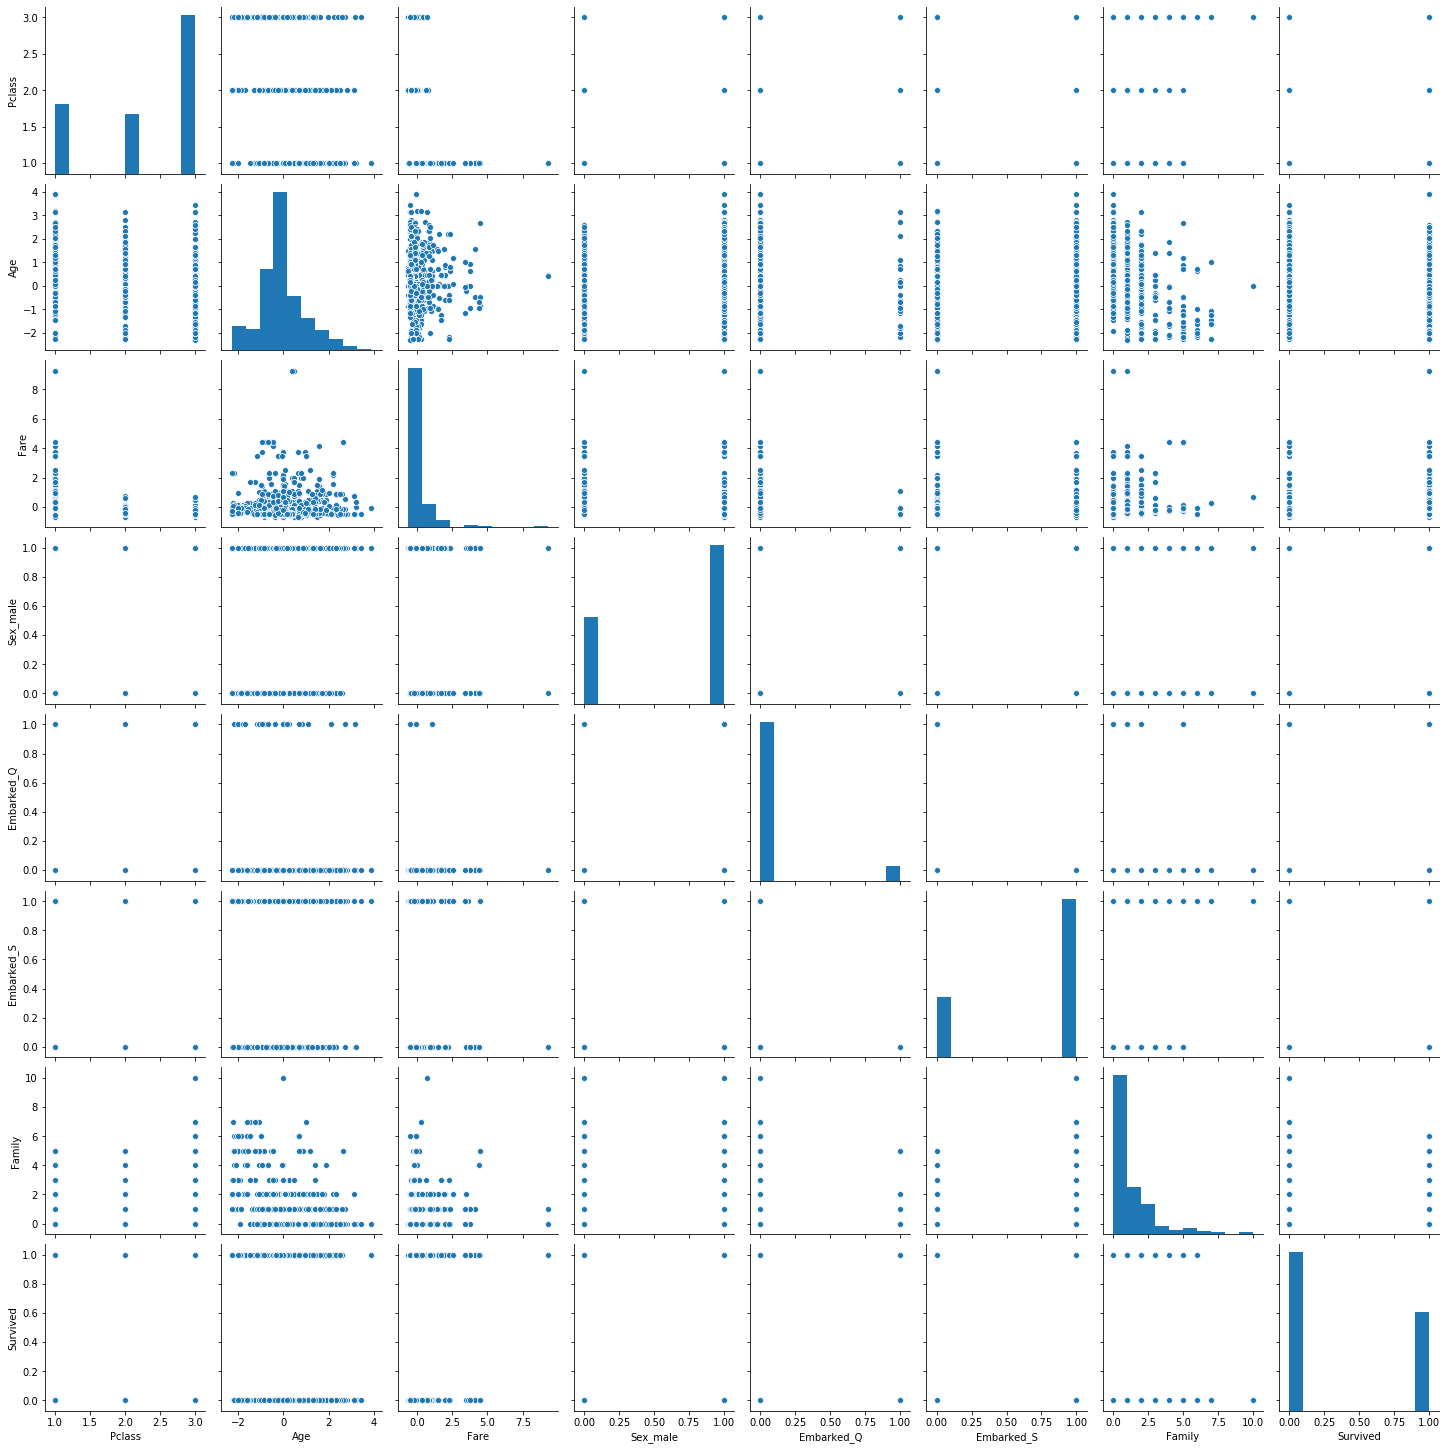

In [28]:
sns.pairplot(z)

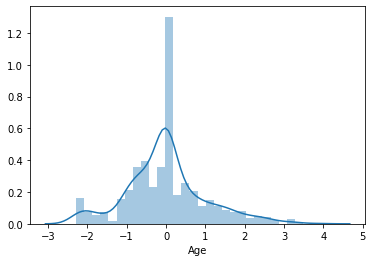

In [31]:
sns.distplot(z.Age,label="AGE")

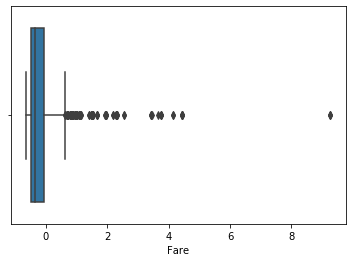

In [38]:
sns.boxplot(z.Fare)

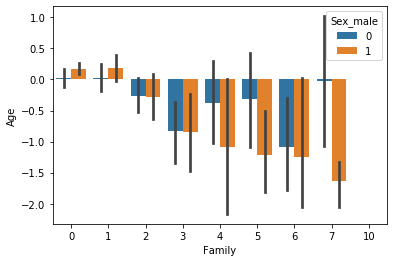

In [45]:
sns.barplot(x=z["Family"],y=z["Age"],hue=z.Sex_male)

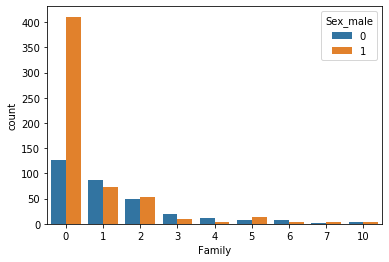

In [53]:
sns.countplot(z.Family,hue=z.Sex_male)

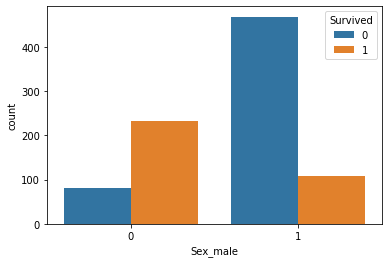

In [56]:
sns.countplot(z.Sex_male,hue=z.Survived)

In [57]:
y.shape

(418, 11)

In [58]:
y_=xy[891:]
y_.shape

(418, 7)

In [59]:
xg=XGBClassifier()

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x_,x_target,test_size=.3,random_state=0)

In [61]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred=xg.predict(x_test)
accuracy_score(y_test,y_pred)*100

82.46268656716418

In [63]:
#adding all

In [75]:
xgb=XGBClassifier()
xgb.fit(x_,x_target)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
y_result=xgb.predict(y_)

In [77]:
sub=pd.DataFrame({"PassengerId":s.PassengerId,"Survived":y_result})
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [78]:
sub.to_csv("xgb_emb.csv",index=False)# .74

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=0)

In [93]:
x_.head()

,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Family
0,3,-0.611972,-0.503595,1,0,1,1
1,1,0.630431,0.734503,0,0,0,1
2,3,-0.301371,-0.490544,0,0,1,0
3,1,0.397481,0.382925,0,0,1,1
4,3,0.397481,-0.488127,1,0,1,0


In [94]:
x_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [95]:
rf.fit(x_,x_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [96]:
result=rf.predict(y_)

In [97]:
sub2=pd.DataFrame({"PassengerId":s.PassengerId,"Survived":result})

In [99]:

sub2.to_csv("rf_emb_xy.csv",index=False)